In [11]:
import numpy as np
import pandas as pd
import os
import skimage
from skimage import io
from skimage import img_as_float
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.metrics import roc_auc_score, f1_score
from os import listdir
from skimage import io, transform, util, img_as_float
from tqdm import tqdm_notebook
from keras_tqdm import TQDMNotebookCallback
from fastnumbers import fast_real
from keras import Sequential
from keras import models
from keras.layers.core import Activation, Reshape, Permute
from keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from tqdm import tqdm
%matplotlib inline

In [17]:
def txt2arr (path):
    yLinesCoords = []
    f = open(path, 'r', encoding='utf-16')
    line = f.readline()
    while line:
        line = f.readline()
        if line.split("	")[0] != "" :
            num1 = line.split("	")[0]
            num2 = line.split("	")[1].split("\n")[0]
            yLinesCoords.append(fast_real(num1))
            yLinesCoords.append(fast_real(num2))
    f.close()
    
    res = np.zeros(3508)
    i = 0
    while i < len(yLinesCoords)/2:
        j = yLinesCoords[2*i]
        while j < yLinesCoords[2*i + 1]:
            res[j]= 1
            j += 1
        i += 1   
    return res

In [43]:
img = skimage.io.imread('train_img/1.jpg', as_grey=True)
x_arr = img / 255.0
print (x_arr)

/home/ivan/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


[[0.00389402 0.00389624 0.00389846 ... 0.00392157 0.00392157 0.00392157]
 [0.00389402 0.00389624 0.00389846 ... 0.00392157 0.00392157 0.00392157]
 [0.00390502 0.00390724 0.00389846 ... 0.00392157 0.00392157 0.00392157]
 ...
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]


In [12]:
def shapeA4 (img):
    padded_img = np.zeros((3508, 2480))
    padded_img[:img.shape[0], :img.shape[1]] = img
    return padded_img

In [13]:
n_train_samples = 84
n_test_samples = 21
n_labels = 2
kernel_first = 5
kernel_second = 7
h = 1754#3508#1760 #3520 #3508
w = 1240#2480#1248 #2496 #2480

In [15]:
if os.path.exists('train_txt_furigana/no_furigana.txt'):
    print ('yes')
else:
    print ('no')

yes


In [44]:
for i, filename in tqdm(enumerate(os.listdir('train_img/')[:n_train_samples])):
    onlyName = filename.split('.')[0]
    img = skimage.io.imread('train_img/' + filename, as_grey=True)
    
    print(onlyName)
    x_arr = img / 255.0
    y_arr = txt2arr('train_txt/' + onlyName + '.txt')
    z_arr = 'init'
    if os.path.exists('train_txt_furigana/' + onlyName +'_furigana.txt'):
        z_arr = txt2arr('train_txt_furigana/' + onlyName +'_furigana.txt')
    else:
        z_arr = txt2arr('train_txt_furigana/no_furigana.txt')
    
    x_arr_1 = x_arr[0:1754, 0:1240]
    y_arr_1 = y_arr[0:1754]
    z_arr_1 = z_arr[0:1754]
    
    x_arr_2 = x_arr[0:1754, 1240:2480]
    y_arr_2 = y_arr[0:1754]
    z_arr_2 = z_arr[0:1754]
    
    x_arr_3 = x_arr[1754:3508, 0:1240]
    y_arr_3 = y_arr[1754:3508]
    z_arr_3 = z_arr[1754:3508]
    
    x_arr_4 = x_arr[1754:3508, 1240:2480]
    y_arr_4 = y_arr[1754:3508]
    z_arr_4 = z_arr[1754:3508]
    
    np.savez_compressed('saved/train/' + onlyName + '_1.npz', x=x_arr_1, y=y_arr_1, z = z_arr_1) 
    np.savez_compressed('saved/train/' + onlyName + '_2.npz', x=x_arr_2, y=y_arr_2, z = z_arr_2) 
    np.savez_compressed('saved/train/' + onlyName + '_3.npz', x=x_arr_3, y=y_arr_3, z = z_arr_3) 
    np.savez_compressed('saved/train/' + onlyName + '_4.npz', x=x_arr_4, y=y_arr_4, z = z_arr_4) 



0it [00:00, ?it/s]

625


/home/ivan/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


1it [00:05,  5.56s/it]

604




2it [00:11,  5.52s/it]

585




3it [00:16,  5.40s/it]

607




4it [00:21,  5.34s/it]

654




5it [00:26,  5.30s/it]

655




6it [00:32,  5.34s/it]

620




7it [00:37,  5.30s/it]

652




8it [00:42,  5.27s/it]

616




9it [00:47,  5.23s/it]

587




10it [00:51,  5.19s/it]

589




11it [00:56,  5.17s/it]

610




12it [01:02,  5.18s/it]

624




13it [01:06,  5.14s/it]

1




14it [01:14,  5.29s/it]

648




15it [01:19,  5.27s/it]

657




16it [01:24,  5.26s/it]

609




17it [01:28,  5.23s/it]

594




18it [01:33,  5.21s/it]

647




19it [01:38,  5.19s/it]

622




20it [01:43,  5.17s/it]

593




21it [01:48,  5.15s/it]

643




22it [01:53,  5.15s/it]

582




23it [01:57,  5.13s/it]

627




24it [02:02,  5.09s/it]

634




25it [02:07,  5.09s/it]

630




26it [02:12,  5.08s/it]

650




27it [02:16,  5.07s/it]

660




28it [02:22,  5.08s/it]

614




29it [02:26,  5.07s/it]

597




30it [02:32,  5.07s/it]

612




31it [02:36,  5.06s/it]

599




32it [02:41,  5.05s/it]

600




33it [02:46,  5.04s/it]

598




34it [02:51,  5.04s/it]

646




35it [02:56,  5.04s/it]

608




36it [03:01,  5.05s/it]

606




37it [03:06,  5.04s/it]

656




38it [03:11,  5.04s/it]

613




39it [03:16,  5.03s/it]

661




40it [03:21,  5.03s/it]

638




41it [03:25,  5.02s/it]

605




42it [03:30,  5.02s/it]

632




43it [03:35,  5.02s/it]

611




44it [03:40,  5.01s/it]

642




45it [03:45,  5.01s/it]

645




46it [03:50,  5.01s/it]

596




47it [03:55,  5.01s/it]

615




48it [03:59,  5.00s/it]

658




49it [04:03,  4.98s/it]

603




50it [04:07,  4.96s/it]

633




51it [04:11,  4.94s/it]

591




52it [04:15,  4.92s/it]

626




53it [04:18,  4.89s/it]

3




54it [04:24,  4.90s/it]

601




55it [04:28,  4.87s/it]

617




56it [04:31,  4.86s/it]

590




57it [04:35,  4.84s/it]

631




58it [04:39,  4.82s/it]

595




59it [04:43,  4.81s/it]

619




60it [04:47,  4.79s/it]

651




61it [04:51,  4.78s/it]

637




62it [04:55,  4.76s/it]

659




63it [04:59,  4.75s/it]

640




64it [05:03,  4.74s/it]

602




65it [05:06,  4.72s/it]

4




66it [05:12,  4.74s/it]

588




67it [05:16,  4.72s/it]

583




68it [05:20,  4.71s/it]

628




69it [05:24,  4.70s/it]

649




70it [05:28,  4.69s/it]

641




71it [05:32,  4.68s/it]

584




72it [05:35,  4.66s/it]

586




73it [05:39,  4.65s/it]

621




74it [05:43,  4.64s/it]

644




75it [05:47,  4.63s/it]

629




76it [05:51,  4.62s/it]

653




77it [05:55,  4.62s/it]

639




78it [05:59,  4.61s/it]

636




79it [06:03,  4.60s/it]

635




80it [06:07,  4.59s/it]

592




81it [06:11,  4.58s/it]

623




82it [06:15,  4.58s/it]

2




83it [06:21,  4.59s/it]

618




84it [06:25,  4.59s/it]



In [45]:
for i, filename in tqdm(enumerate(os.listdir('test_img/')[:n_test_samples])):
    onlyName = filename.split('.')[0]
    img = skimage.io.imread('test_img/' + filename, as_grey=True)
    x_arr = img / 255.0
    y_arr = txt2arr('test_txt/' + onlyName + '.txt')
    z_arr = 'init'
    if os.path.exists('test_txt_furigana/' + onlyName +'_furigana.txt'):
        z_arr = txt2arr('test_txt_furigana/' + onlyName +'_furigana.txt')
    else:
        z_arr = txt2arr('test_txt_furigana/no_furigana.txt')
    
    x_arr_1 = x_arr[0:1754, 0:1240]
    y_arr_1 = y_arr[0:1754]
    z_arr_1 = z_arr[0:1754]
    
    x_arr_2 = x_arr[0:1754, 1240:2480]
    y_arr_2 = y_arr[0:1754]
    z_arr_2 = z_arr[0:1754]
    
    x_arr_3 = x_arr[1754:3508, 0:1240]
    y_arr_3 = y_arr[1754:3508]
    z_arr_3 = z_arr[1754:3508]
    
    x_arr_4 = x_arr[1754:3508, 1240:2480]
    y_arr_4 = y_arr[1754:3508]
    z_arr_4 = z_arr[1754:3508]
    
    np.savez_compressed('saved/test/' + onlyName + '_1.npz', x=x_arr_1, y=y_arr_1, z = z_arr_1) 
    np.savez_compressed('saved/test/' + onlyName + '_2.npz', x=x_arr_2, y=y_arr_2, z = z_arr_2) 
    np.savez_compressed('saved/test/' + onlyName + '_3.npz', x=x_arr_3, y=y_arr_3, z = z_arr_3) 
    np.savez_compressed('saved/test/' + onlyName + '_4.npz', x=x_arr_4, y=y_arr_4, z = z_arr_4) 



0it [00:00, ?it/s]/home/ivan/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


1it [00:04,  4.02s/it]

2it [00:07,  3.99s/it]

3it [00:12,  4.00s/it]

4it [00:15,  3.99s/it]

5it [00:19,  4.00s/it]

6it [00:24,  4.05s/it]

7it [00:28,  4.14s/it]

8it [00:33,  4.13s/it]

9it [00:36,  4.11s/it]

10it [00:41,  4.12s/it]

11it [00:45,  4.12s/it]

12it [00:49,  4.11s/it]

13it [00:55,  4.26s/it]

14it [00:59,  4.25s/it]

15it [01:03,  4.24s/it]

16it [01:07,  4.23s/it]

17it [01:11,  4.22s/it]

18it [01:15,  4.21s/it]

19it [01:19,  4.19s/it]

20it [01:23,  4.19s/it]

21it [01:27,  4.19s/it]



In [46]:
def img_generator(directory, batch_size):
    filenames = os.listdir(directory)
    while True:
        n_iter = len(filenames) // batch_size
        residual = len(filenames) % batch_size
        for i in range(n_iter):
            size = batch_size
            if (i == n_iter - 1) and (residual > 0):
                size = residual
            X = np.zeros((batch_size, h, w, 1))
            y = np.zeros((batch_size, h))
            z = np.zeros((batch_size, h))
            for j in range(size):
                X[j] = np.load(directory + filenames[i * batch_size + j])['x'].reshape((h, w, 1))
                y[j] = np.load(directory + filenames[i * batch_size + j])['y']
                z[j] = np.load(directory + filenames[i * batch_size + j])['z']
            y = np.stack((y, z), axis=2)
            yield X, y

/home/ivan/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [47]:
autoencoder = Sequential()
encoding_layers = [
    Convolution2D(8, kernel_first, kernel_first, border_mode='same', input_shape=( 1754, 1240, 1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((4,4)),
#    
    Convolution2D(16, kernel_first, kernel_first, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((3,3)),
#    
    Convolution2D(16, kernel_second, kernel_second, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
#  
    Convolution2D(16, kernel_first, kernel_first, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
#    
    Convolution2D(4, kernel_first, kernel_first, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
]


for l in encoding_layers:
    autoencoder.add(l)
    #print(l.input_shape,l.output_shape,l)
autoencoder.add(Flatten())
autoencoder.add(Dense(1754 * 2, activation='sigmoid'))
autoencoder.add(Reshape((1754, 2)))

/home/ivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (5, 5), input_shape=(1754, 124..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same")`
  
/home/ivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (7, 7), padding="same")`
  del sys.path[0]
/home/ivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same")`
/home/ivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (5, 5), padding="same")`


In [48]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 1754, 1240, 8)     208       
_________________________________________________________________
batch_normalization_6 (Batch (None, 1754, 1240, 8)     32        
_________________________________________________________________
activation_6 (Activation)    (None, 1754, 1240, 8)     0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 438, 310, 8)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 438, 310, 16)      3216      
_________________________________________________________________
batch_normalization_7 (Batch (None, 438, 310, 16)      64        
_________________________________________________________________
activation_7 (Activation)    (None, 438, 310, 16)      0         
__________

/home/ivan/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [49]:
gen = img_generator('saved/train/', 5)
x_, y_ = next(gen)

In [50]:
y_.shape

(5, 1754, 2)

/home/ivan/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [52]:
train_generator = img_generator('saved/train/', 5)
test_generator = img_generator('saved/test/', 5)

autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
autoencoder.fit_generator(train_generator, steps_per_epoch=100//5, epochs=5, validation_data=test_generator, validation_steps=4)

/home/ivan/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


Epoch 1/5
20/20 [==============================] - 2262s 113s/step - loss: 0.0046 - acc: 0.9453 - val_loss: 0.0086 - val_acc: 0.9438
Epoch 2/5
20/20 [==============================] - 2078s 104s/step - loss: 2.4239e-04 - acc: 0.9475 - val_loss: 0.0123 - val_acc: 0.9415
Epoch 3/5
20/20 [==============================] - 2063s 103s/step - loss: 5.8787e-06 - acc: 0.9509 - val_loss: 0.0258 - val_acc: 0.9179
Epoch 4/5
20/20 [==============================] - 2071s 104s/step - loss: 0.0016 - acc: 0.9401 - val_loss: 4.0418e-05 - val_acc: 0.9540
Epoch 5/5
20/20 [==============================] - 2065s 103s/step - loss: 7.9837e-04 - acc: 0.9481 - val_loss: 6.1660e-05 - val_acc: 0.9546


In [53]:
autoencoder.save('temp/model.h5')
#autoencoder = load_model('temp/model.h5')

/home/ivan/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


/home/ivan/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


[  11   41   56   76   86  116  121  171  181  201  216  271  301  341
  356  406  426  476  491  536  556  601  621  656  681  726  746  826
  851  891  916  961  981 1016 1036 1086 1111 1491 1496 1546 1551 1596
 1601 1701 1706 1746]
[  21   41   56   76   91  111  121  146  186  206  251  271  301  341
  356  406  426  476  496  536  556  601  626  656  681  726  746  826
  851  891  916  961  981 1016 1036 1086 1116 1486 1491 1536 1541 1591
 1601 1696 1706]


In [69]:
lines = arr2lines(res)

In [70]:
print(lines)

[ 313  329  361  393  409  449  465  497  513  537  569  601  617  649
  665  705  721  753  769  809  825  857  873  913  929  961  977 1017
 1033 1065 1081 1129 1145 1169 1185 1233 1249 1273 1289 1321 1353 1377
 1393 1425 1441 1489 1505 1529 1545 1593 1609 1633 1649 1697 1713 1737]


In [79]:
def arr2lines(arr, delta = 5):
    size = len(arr)
    #фильтрация шума
    i = 0
    while (i+delta < size):
        sum = 0
        for k in range(delta):
            sum += arr[i+k]
        if (sum > delta/2):
            for k in range(delta):
                arr[i+k] = 1
        else:
            for k in range(delta):
                arr[i+k] = 0
        i+=delta
    while i<size:
        arr[i] = 0 
        i+=1
        
    #нахождение строк
    listLines = []
    i = 1
    prev = arr[0]
    cur = arr[1]
    while i < size:
        if prev != cur:
            listLines.append(i)
        prev = cur
        cur = arr[i]
        i+=1
    res = np.array(listLines)
    return res

/home/ivan/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [ ]:
def vizual4arr (arr, width = 50):
    

In [59]:
A = np.array([1,2,3])
B = np.array([2,3,4])
result = np.abs(A-B).mean
print (result)

<built-in method mean of numpy.ndarray object at 0x7fbe98505710>


In [49]:
def getLinesFromFile (path):
    data = []
    f = open(path, 'r', encoding='utf-16')
    line = f.readline()
    while line:
        line = f.readline()
        if line.split("	")[0] != "" :
            num1 = line.split("	")[0]
            num2 = line.split("	")[1].split("\n")[0]
            data.append(fast_real(num1))
            data.append(fast_real(num2))
    f.close()
    res = np.array(data)
    return res

In [54]:
origLines = getLinesFromFile('test_txt/662.txt')[0:56]
print(origLines)
print(len(origLines))

[ 313  336  355  391  407  443  460  495  512  547  563  600  615  651
  668  703  719  756  771  808  823  859  876  912  927  963  979 1015
 1031 1067 1083 1119 1135 1171 1186 1223 1239 1275 1291 1327 1343 1379
 1395 1431 1447 1483 1499 1535 1552 1587 1603 1640 1656 1691 1707 1743]
56


In [60]:
def getMeanArrDiff (A, B):
    size = min (len(A), len(B))
    absSum = 0
    for i in range(size):
        absSum += abs (A[i] - B[i])
    return absSum/size

In [61]:
print (getMeanArrDiff (origLines, lines))

3.8214285714285716


In [66]:
def getArrDiff (A, B):
    size = min (len(A), len(B))
    absRes = []
    for i in range(size):
        absRes.append(abs(A[i] - B[i]))
    res =np.array(absRes)
    return res

(array([ 1.,  5., 22.,  3.,  0.,  1., 14.,  4.,  0.,  6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

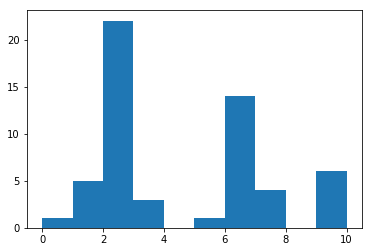

In [71]:
import matplotlib.pyplot as plt
plt.hist (getArrDiff(origLines, lines))